# Solving a Model file

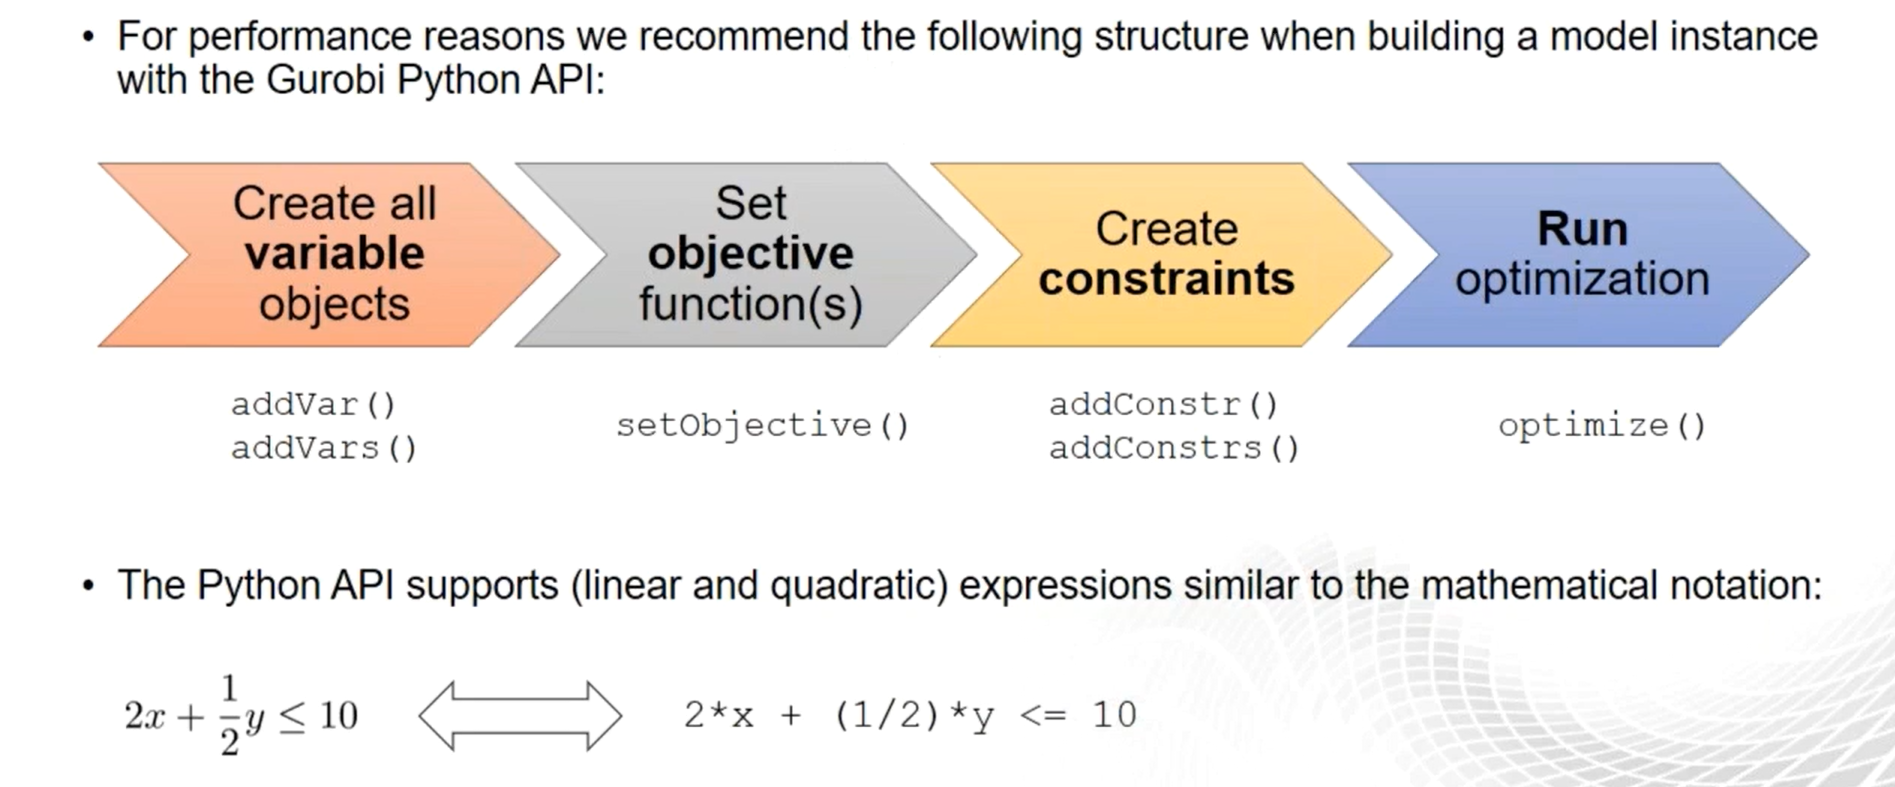

#### Step 1 : import function from the gurobipy module

In [1]:
from gurobipy import *

#### Step 2 : Create model object from model file

In [9]:
model = read("D:/Downloads/afiro.mps")

Read MPS format model from file D:/Downloads/afiro.mps
Reading time = 0.00 seconds
AFIRO: 27 rows, 32 columns, 83 nonzeros


#### Step 3: Solve model to optimality

In [10]:
model.optimize()

Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (win64 - Windows 11+.0 (26200.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 27 rows, 32 columns and 83 nonzeros (Min)
Model fingerprint: 0x092217cc
Model has 5 linear objective coefficients
Coefficient statistics:
  Matrix range     [1e-01, 2e+00]
  Objective range  [3e-01, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+01, 5e+02]
Presolve removed 21 rows and 23 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 26 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.2218703e+02   5.976175e+01   0.000000e+00      0s
       2   -4.6475314e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective -4.647531429e+02


#### Step 4: Display optimal objective value

In [11]:
model.ObjVal

-464.75314285714285

#### Step 5 : Display variable values

In [12]:
model.printAttr("x")


    Variable            x 
-------------------------
         X01           80 
         X02         25.5 
         X03         54.5 
         X04         84.8 
         X06      18.2143 
         X14      18.2143 
         X16      19.3071 
         X22          500 
         X23       475.92 
         X24        24.08 
         X26          215 
         X36      339.943 
         X37      383.943 


# Creating our first model

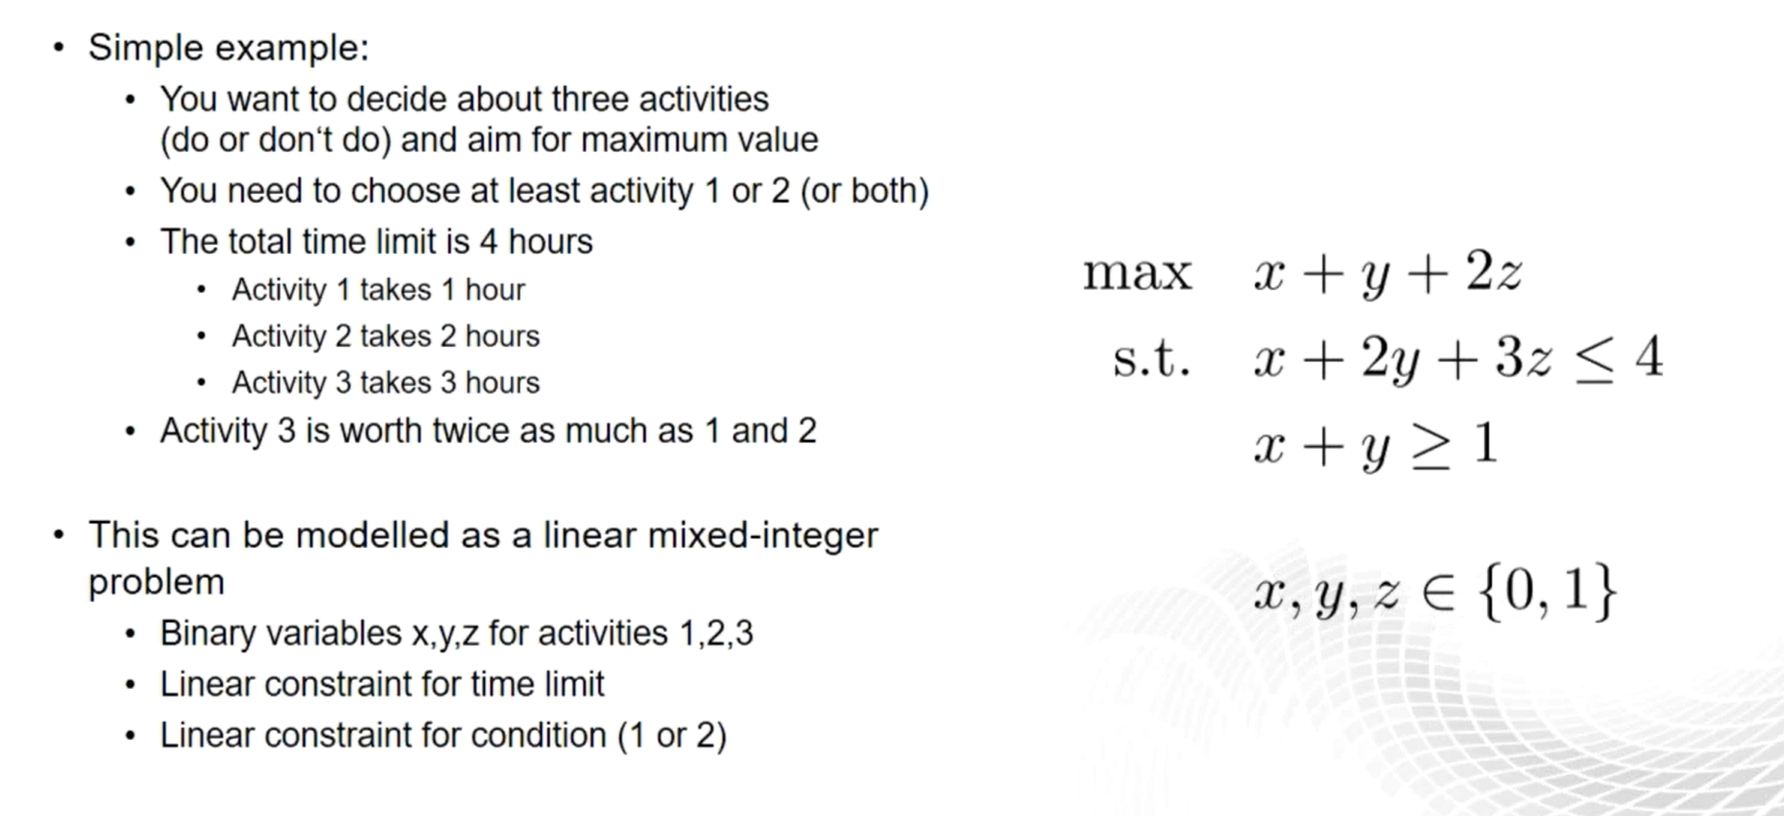

### Example

$$\begin{array}{rll}
    \text{max} & x+y+2z \\
    \text{S.t} & x + 2y + 3z \le 4\\
    & x + y \ge 1 \\[10pt]
    & x, y, z \in \lbrace 0,1 \rbrace 
    \end{array}
$$

In [15]:
m = Model() #2 Creating empty model

In [16]:
# 3 Create activity vaariable
x = m.addVar(vtype = GRB.BINARY, name = "x")
y= m.addVar(vtype = GRB.BINARY, name = "y")
z = m.addVar(vtype = GRB.BINARY, name = "z")

In [18]:
# 4 Set Objective function
m.setObjective(x + y + 2*z, GRB.MAXIMIZE)

In [20]:
# 5 Add constraints
c1 = m.addConstr(x + 2*y + 3*z <= 4)
c2 = m.addConstr(x + y >= 1)

In [21]:
# 6 Solve model
m.optimize()

Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (win64 - Windows 11+.0 (26200.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 4 rows, 3 columns and 10 nonzeros (Max)
Model fingerprint: 0xb9b33883
Model has 3 linear objective coefficients
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 4 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 20 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.00

In [23]:
# Optimal solutions 
m.printAttr('x')


    Variable            x 
-------------------------
           x            1 
           z            1 
